In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install osmnx networkx matplotlib


   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 13.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 15.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------- ----------------------- 10.0/24.5 MB 47.8 MB/s eta 0:00:01
   ----------------------------- ---------- 18.1/24.5 MB 45.6 MB/s eta 0:00:01
   ----------------------------------- ---- 21.8/24.5 MB 36.2 MB/s eta 0:00:01
   ---------------------------------------  24.4/24.5 MB 35.1 MB/s eta 0:00:01
   ---------------------------------------- 24.5/24.5 MB 25.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.2 MB ? eta -:--:--
   - -------------------------------------- 0.3/6.2 MB ? eta -:--:--
   -------------------------- ------------- 4.2/6.2 MB 14.8 MB/s eta 0:00:01
   -------------------------

C:\Users\hsy\AppData\Local\Temp\ipykernel_15208\1534302151.py:22: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_place("Yuseong-gu, Daejeon, South Korea", tags=tags)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPy

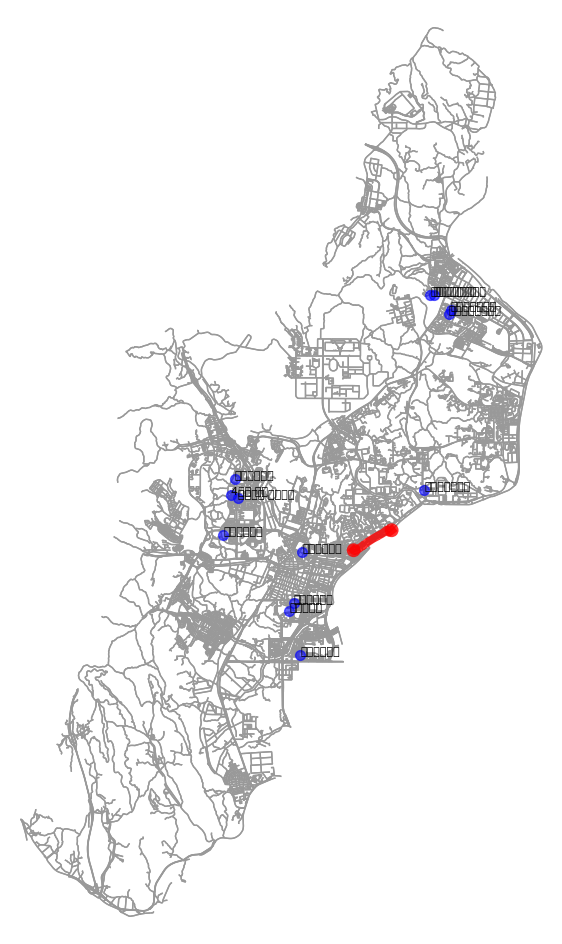

In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# 대전 유성구의 도로 네트워크 불러오기
G = ox.graph_from_place("Yuseong-gu, Daejeon, South Korea", network_type="walk")

# 출발점: 한밭대학교의 위도, 경도 좌표
start_latlng = (36.351, 127.385)  # 한밭대학교 근처 좌표
end_latlng = (36.362, 127.356)  # 유성온천역 근처 좌표

# 좌표를 가장 가까운 노드로 변환
start_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
end_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])

# 최단 경로 탐색 (거리 기준 최단 경로)
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')

# 학교 및 역 이름 표시를 위한 POI 데이터 가져오기
tags = {'amenity': ['school', 'university', 'bus_station', 'subway_entrance']}
pois = ox.geometries_from_place("Yuseong-gu, Daejeon, South Korea", tags=tags)

# Point 형식의 지오메트리만 필터링
pois_points = pois[pois.geometry.type == 'Point']

# 경로와 POI 시각화
def plot_route_with_pois(G, route, pois_points):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, bgcolor='white',
        figsize=(12, 12), route_alpha=0.8, route_color='red',
        show=False, close=False
    )
    
    # POI 데이터 플롯
    pois_points.plot(ax=ax, color='blue', markersize=50, alpha=0.6)
    
    # POI 이름 라벨 추가
    for x, y, label in zip(pois_points.geometry.x, pois_points.geometry.y, pois_points.name):
        ax.text(x, y, label, fontsize=8, color='black')
    
    plt.show()

# 경로와 POI를 함께 시각화
plot_route_with_pois(G, shortest_path, pois_points)


C:\Users\hsy\AppData\Local\Temp\ipykernel_15208\174066.py:24: FutureWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  pois = ox.geometries_from_place("Yuseong-gu, Daejeon, South Korea", tags=tags)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython

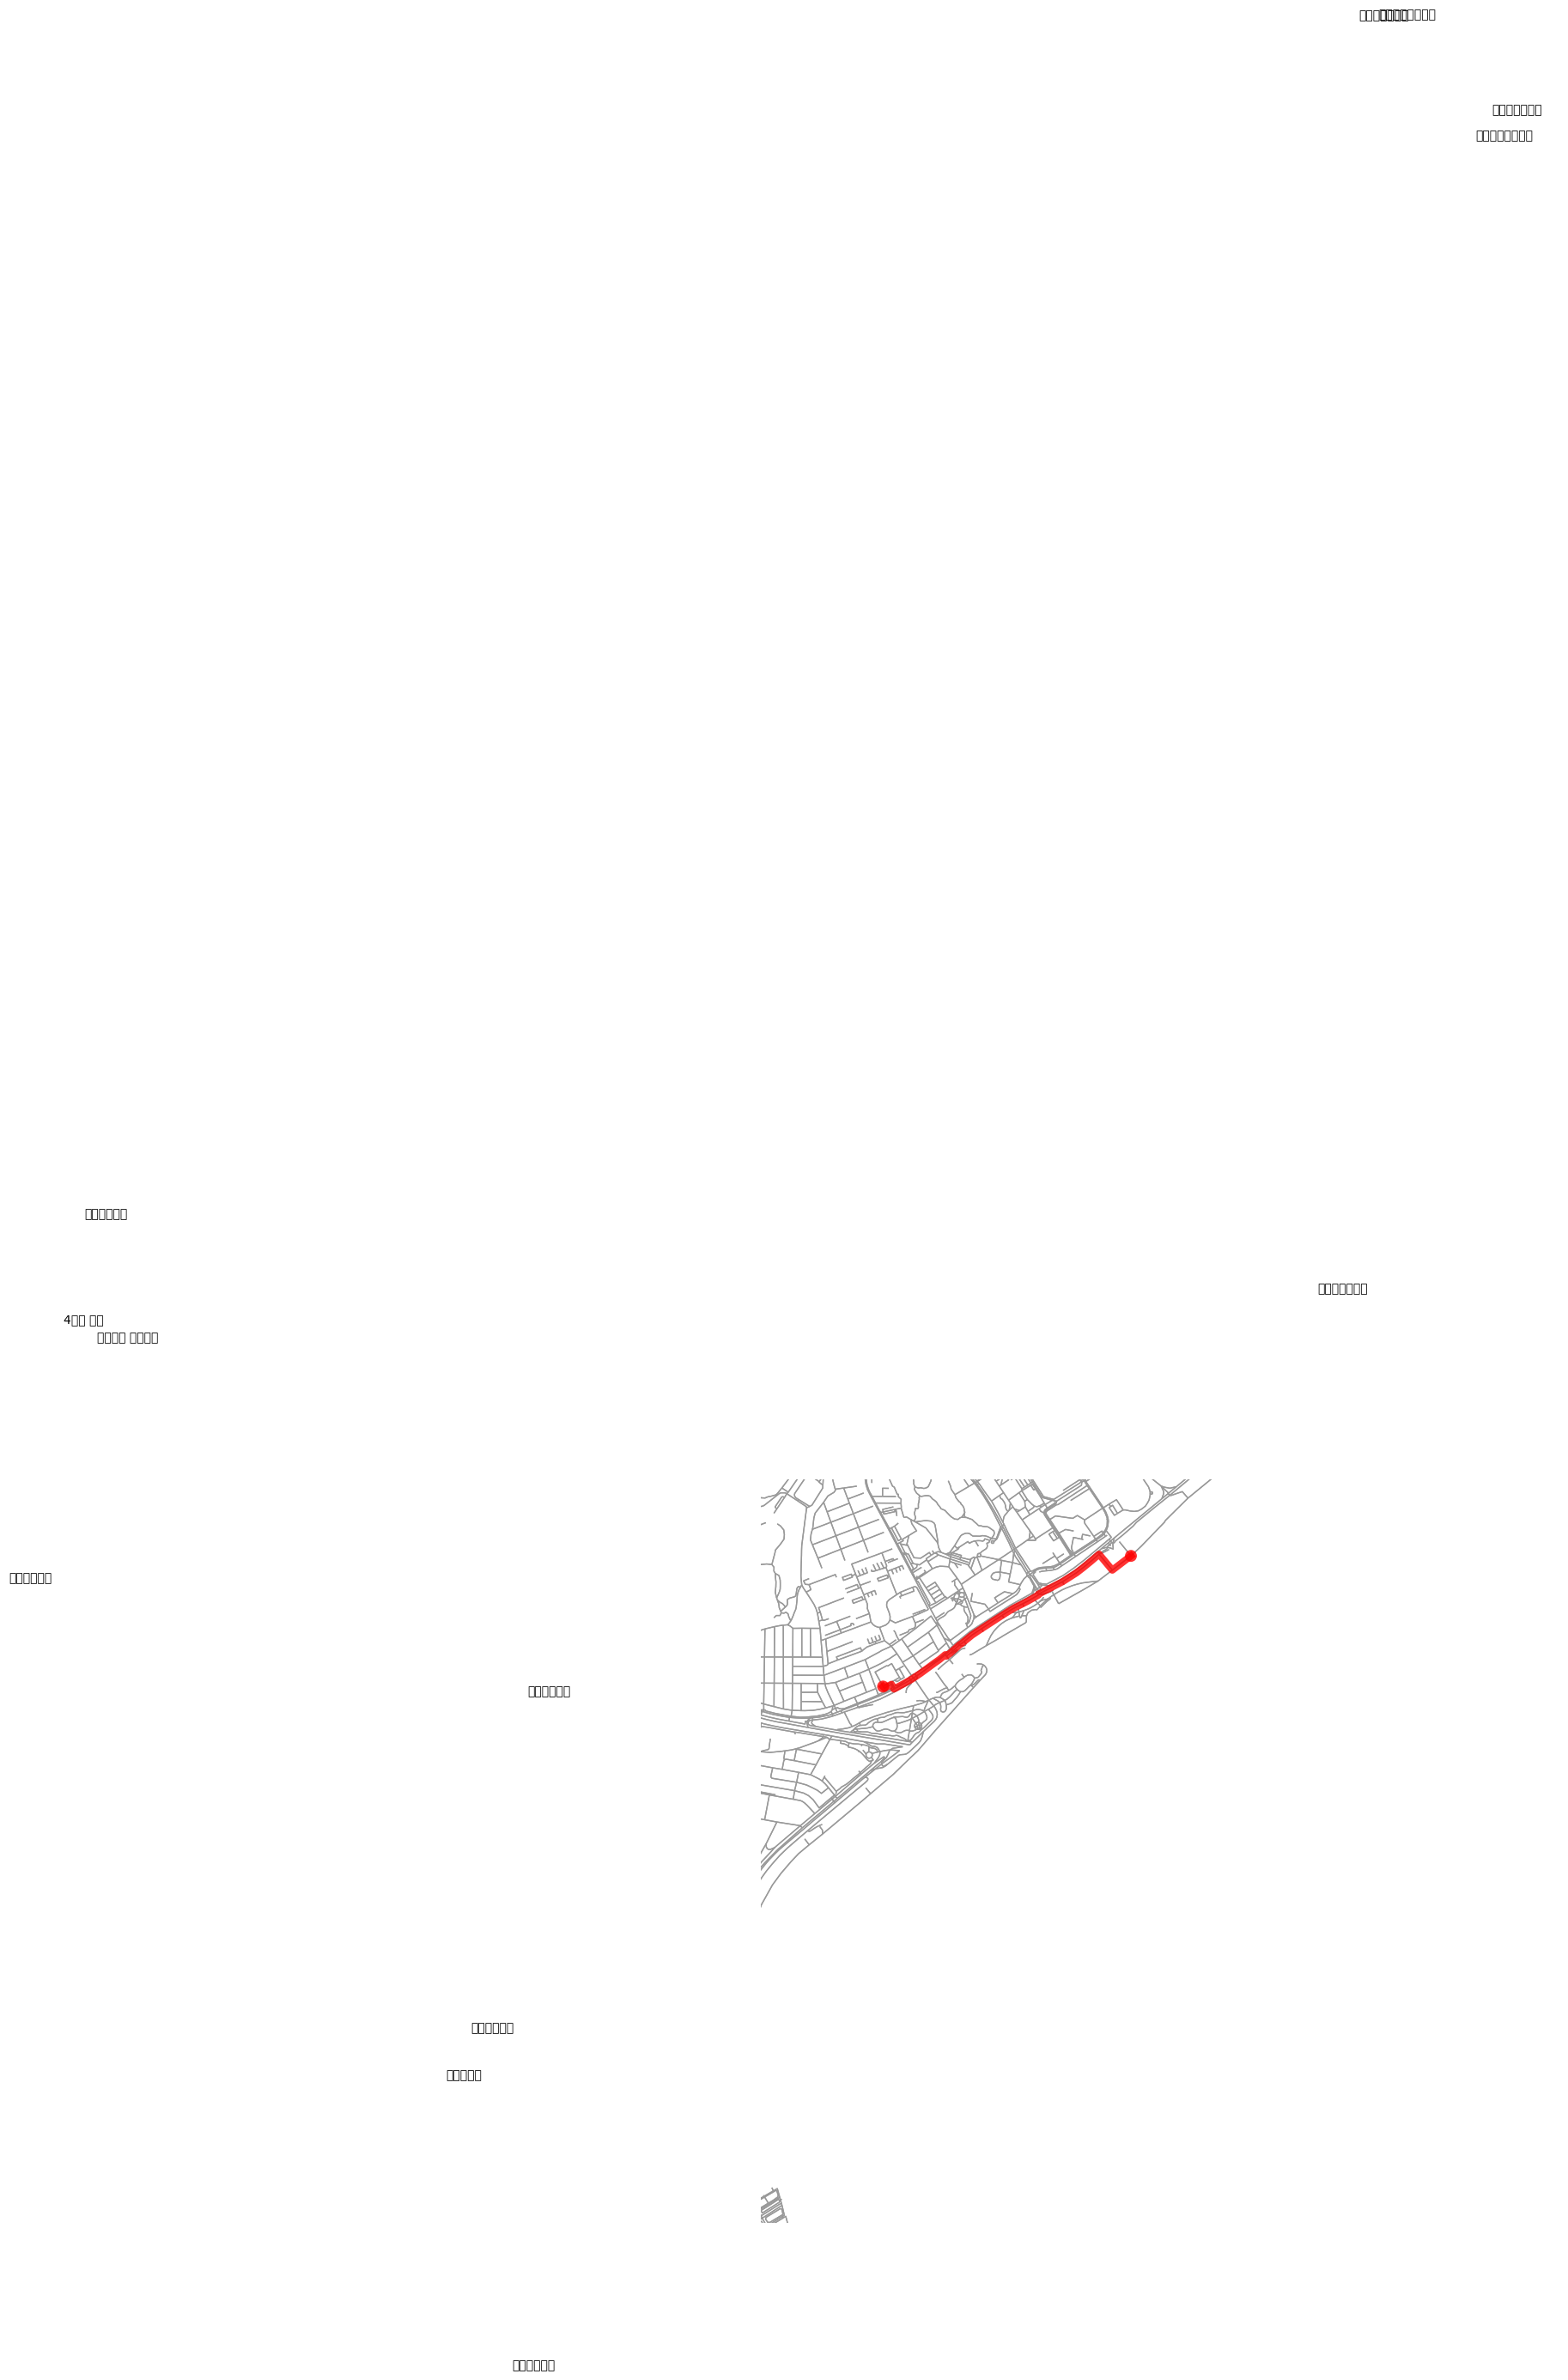

In [5]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# 대전 유성구의 도로 네트워크 불러오기
G = ox.graph_from_place("Yuseong-gu, Daejeon, South Korea", network_type="walk")

# 출발점: 한밭대학교의 위도, 경도 좌표
start_latlng = (36.351, 127.385)  # 한밭대학교 근처 좌표
# 도착점: 유성온천역의 위도, 경도 좌표
end_latlng = (36.362, 127.356)    # 유성온천역 근처 좌표

# 좌표를 가장 가까운 노드로 변환
start_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
end_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])

# 최단 경로 탐색 (거리 기준 최단 경로)
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')

# 학교 및 역 이름 표시를 위한 POI 데이터 가져오기
# 주요 POI 태그 설정 (예: 학교, 대학교, 버스 정류장, 지하철 출입구)
tags = {'amenity': ['school', 'university', 'bus_station', 'subway_entrance']}
pois = ox.geometries_from_place("Yuseong-gu, Daejeon, South Korea", tags=tags)

# Point 형식의 지오메트리만 필터링
pois_points = pois[pois.geometry.type == 'Point']

# 'name'이 존재하는 POI만 선택
pois_points = pois_points[pois_points['name'].notnull()]

# 경로와 POI 시각화
def plot_route_with_pois(G, route, pois_points):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, bgcolor='white',
        figsize=(12, 12), route_alpha=0.8, route_color='red',
        show=False, close=False
    )
    
    # POI 데이터 플롯
    pois_points.plot(ax=ax, color='blue', markersize=50, alpha=0.6)
    
    # POI 이름 라벨 추가
    for idx, row in pois_points.iterrows():
        x, y = row.geometry.x, row.geometry.y
        label = row['name']
        ax.text(x, y, label, fontsize=10, color='black', ha='center', va='bottom')
    
    # 지도 축 범위 조정 (필요에 따라 수정)
    minx, miny = 127.35, 36.34  # 왼쪽 하단 (경도, 위도)
    maxx, maxy = 127.39, 36.37  # 오른쪽 상단 (경도, 위도)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    
    plt.show()

# 경로와 POI를 함께 시각화
plot_route_with_pois(G, shortest_path, pois_points)


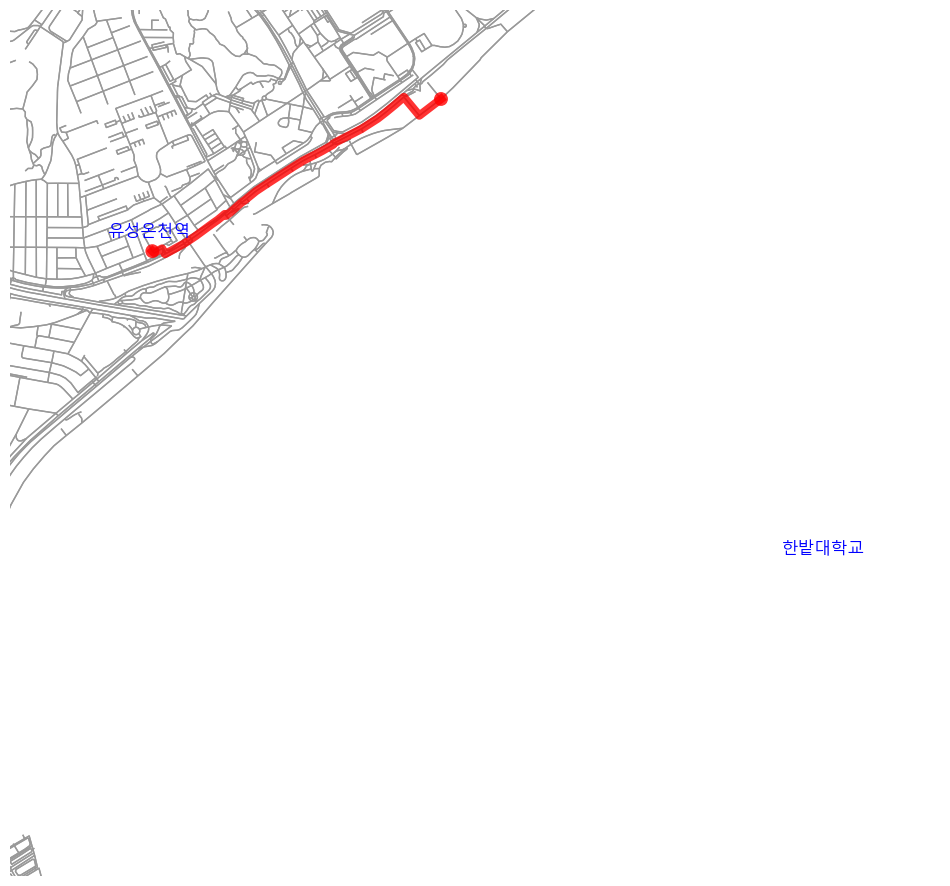

In [6]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows: 'Malgun Gothic', Mac: 'AppleGothic', Linux: 'NanumGothic'
plt.rc('axes', unicode_minus=False)  # 마이너스 기호 깨짐 방지

# 대전 유성구의 도로 네트워크 불러오기
G = ox.graph_from_place("Yuseong-gu, Daejeon, South Korea", network_type="walk")

# 출발점: 한밭대학교의 위도, 경도 좌표
start_latlng = (36.351, 127.385)  # 한밭대학교 근처 좌표
# 도착점: 유성온천역의 위도, 경도 좌표
end_latlng = (36.362, 127.356)    # 유성온천역 근처 좌표

# 좌표를 가장 가까운 노드로 변환
start_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
end_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])

# 최단 경로 탐색 (거리 기준 최단 경로)
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')

# 경로와 출발점 및 도착점만 시각화
def plot_route_with_labels(G, route, start_latlng, end_latlng):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, bgcolor='white',
        figsize=(12, 12), route_alpha=0.8, route_color='red',
        show=False, close=False
    )
    
    # 출발점과 도착점 라벨 추가
    ax.text(start_latlng[1], start_latlng[0], '한밭대학교', fontsize=12, color='blue', ha='center', va='bottom')
    ax.text(end_latlng[1], end_latlng[0], '유성온천역', fontsize=12, color='blue', ha='center', va='bottom')
    
    # 지도 축 범위 조정
    minx, miny = 127.35, 36.34  # 왼쪽 하단 (경도, 위도)
    maxx, maxy = 127.39, 36.37  # 오른쪽 상단 (경도, 위도)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    
    plt.show()

# 경로와 출발점/도착점만 시각화
plot_route_with_labels(G, shortest_path, start_latlng, end_latlng)


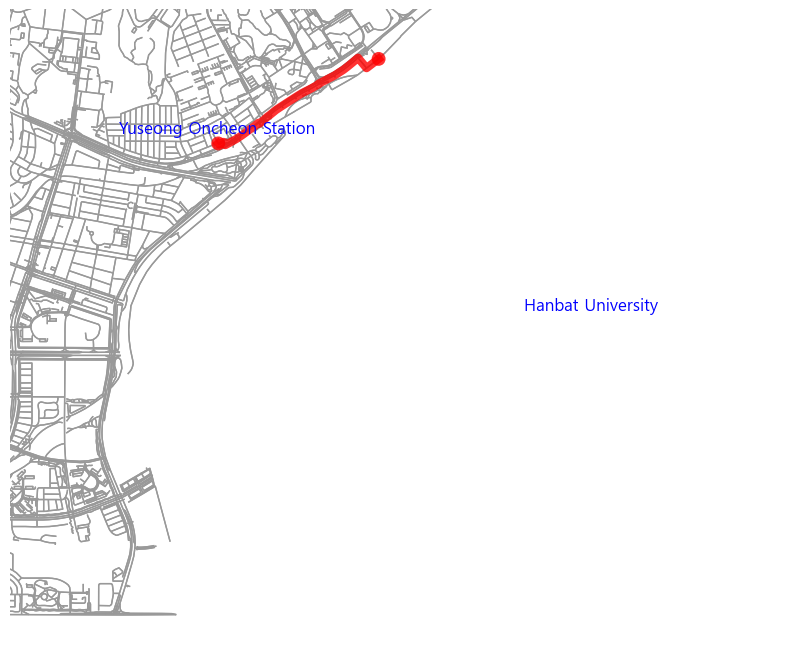

In [7]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 대전 유성구의 도로 네트워크 불러오기
G = ox.graph_from_place("Yuseong-gu, Daejeon, South Korea", network_type="walk")

# 출발점: 한밭대학교의 위도, 경도 좌표
start_latlng = (36.351, 127.385)  # 한밭대학교 근처 좌표
# 도착점: 유성온천역의 위도, 경도 좌표
end_latlng = (36.362, 127.356)    # 유성온천역 근처 좌표

# 좌표를 가장 가까운 노드로 변환
start_node = ox.distance.nearest_nodes(G, start_latlng[1], start_latlng[0])
end_node = ox.distance.nearest_nodes(G, end_latlng[1], end_latlng[0])

# 최단 경로 탐색 (거리 기준 최단 경로)
shortest_path = nx.shortest_path(G, start_node, end_node, weight='length')

# 경로와 출발점 및 도착점만 시각화
def plot_route_with_labels(G, route, start_latlng, end_latlng):
    fig, ax = ox.plot_graph_route(
        G, route, route_linewidth=6, node_size=0, bgcolor='white',
        figsize=(10, 10), route_alpha=0.8, route_color='red',
        show=False, close=False
    )
    
    # 출발점과 도착점 라벨 추가 (영어로 표시)
    ax.text(start_latlng[1], start_latlng[0], 'Hanbat University', fontsize=12, color='blue', ha='center', va='bottom')
    ax.text(end_latlng[1], end_latlng[0], 'Yuseong Oncheon Station', fontsize=12, color='blue', ha='center', va='bottom')
    
    # 지도 축 범위 조정 (더 넓은 범위 설정)
    minx, miny = 127.34, 36.33  # 왼쪽 하단 (경도, 위도)
    maxx, maxy = 127.40, 36.37  # 오른쪽 상단 (경도, 위도)
    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    
    plt.show()

# 경로와 출발점/도착점만 시각화
plot_route_with_labels(G, shortest_path, start_latlng, end_latlng)


In [8]:
!conda install -c conda-forge gdal rasterio --yes


Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hsy\anaconda3\envs\tf217_python312

  added / updated specs:
    - gdal
    - rasterio


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    affine-2.4.0               |     pyhd8ed1ab_0          18 KB  conda-forge
    cairo-1.16.0               |       hc68a040_5         2.3 MB
    click-plugins-1.1.1        |             py_0           9 KB  conda-forge
    cligj-0.7.2                |     pyhd8ed1ab_1          10 KB  conda-forge
    fontconfig-2.14.1          |       hb33846d_3         224 KB
    freexl-2.0.0               |       hd7a5696_0          84 KB
    gdal-3.6.2                 |  py312h8827949_6         1.8 MB
    geos-3.8.0                 |       h33f27b4_0         905 KB
    geotiff-1.7.0              |       h4545760_3         133 KB
    glib-2.78.4                |       hd77b12b_0



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\threading.py:1016: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs


In [9]:
!pip install osmnx networkx matplotlib
!pip install gdal rasterio


c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  return process_handler(cmd, _system_body)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  return process_handler(cmd, _system_body)


In [10]:
!pip install rasterio gdal


In [11]:
!pip install gdal


In [12]:
!apt-get update && apt-get install -y libgdal-dev gdal-bin python3-gdal


'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [19]:
# import gdal
# print(f"GDAL version: {gdal.VersionInfo()}")
setx GDAL_DATA "C:\Users\hsy\anaconda3\envs\tf217_python312\Library\share\gdal"



SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (327042114.py, line 3)

In [17]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: Malgun Gothic)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 환경에서는 'Malgun Gothic'을 사용
plt.rcParams['axes.unicode_minus'] = False  # 한글 폰트 설정 후 마이너스 표시 깨짐 방지


In [8]:
import rasterio
import gdal

print(f"Rasterio version: {rasterio.__version__}")
print(f"GDAL version: {gdal.VersionInfo()}")


ModuleNotFoundError: No module named 'gdal'

In [20]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 1. 지도 데이터 불러오기: 좌표 중심으로 반경 500m의 네트워크 생성
center_point = (36.3575, 127.3445)  # 궁동 중심부 (대략적인 은골어린이공원 좌표)
G = ox.graph_from_point(center_point, dist=500, network_type="walk")

# 2. 고도 데이터를 추가하기 위해 SRTM을 이용해 노드의 고도 정보 가져오기
# SRTM 데이터를 다운로드하여 노드에 고도 추가
G = ox.elevation.add_node_elevations_raster(G, filepath="/kaggle/input/srtmdataset/srtm_62_05.tif", cpus=1)

# 3. 노드 고도 데이터를 바탕으로 경사도(grade) 계산 및 추가
G = ox.add_edge_grades(G)

# 4. 장애물 데이터를 반영하기 위해 기본 가중치 설정
for u, v, data in G.edges(data=True):
    data['weight'] = data.get('length', 1)

    # 경사도 10% 이상의 경우 가중치 증가
    if data['grade'] > 0.1:
        data['weight'] += 5000

# 5. 출발지와 도착지 설정
start_latlng = (36.3575, 127.3445)  # 은골어린이공원 좌표
end_latlng = (36.3582, 127.3459)    # 궁동119안전센터 좌표

# 좌표로부터 가장 가까운 노드 ID 찾기
start_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
end_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])

# 6. 최단 경로 탐색
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')

# 7. 최단 경로 거리 출력
shortest_path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='weight')
print(f"최단 경로 길이: {shortest_path_length:.2f}m")

# 8. 경로 시각화import osmnx as ox
import networkx as nx
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# 1. 지도 데이터 가져오기
center_point = (36.3575, 127.3445)  # 대전광역시 궁동 중심
G = ox.graph_from_point(center_point, dist=500, network_type="walk")

# 2. SRTM 고도 데이터 파일 경로
srtm_path = "/kaggle/input/srtmdataset/srtm_62_05.tif"  # 업로드한 SRTM 데이터 파일 경로

# 3. 고도 데이터 추가: Rasterio를 사용해 각 노드에 고도 정보 추가
with rasterio.open(srtm_path) as src:
    for node, data in G.nodes(data=True):
        lon, lat = data['x'], data['y']
        # 고도 값을 SRTM에서 추출
        data['elevation'] = list(src.sample([(lon, lat)]))[0][0]

# 4. 경사도(grade) 계산: 엣지의 시작과 끝 노드 간의 고도 차이를 바탕으로 계산
for u, v, data in G.edges(data=True):
    elevation_diff = G.nodes[v]['elevation'] - G.nodes[u]['elevation']
    length = data['length']
    grade = elevation_diff / length if length != 0 else 0
    data['grade'] = grade
    data['weight'] = data['length'] + abs(grade) * 1000  # 경사도 반영한 가중치 설정

# 5. 출발지와 도착지 설정
start_latlng = (36.3575, 127.3445)  # 은골어린이공원
end_latlng = (36.3582, 127.3459)    # 궁동119안전센터

start_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
end_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])

# 6. 최단 경로 탐색: 경사도를 고려한 가중치(weight)를 사용
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='weight')

# 7. 경로 시각화
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0, bgcolor='white')
plt.show()

# 8. 최단 경로 거리 출력
shortest_path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='weight')
print(f"최단 경로 길이 (경사도 반영): {shortest_path_length:.2f}m")

fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0, bgcolor='white')
plt.show()


c:\Users\hsy\anaconda3\envs\tf217_python312\Lib\site-packages\osmnx\graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


ImportError: gdal and rasterio must be installed to query raster files

/opt/conda/lib/python3.10/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


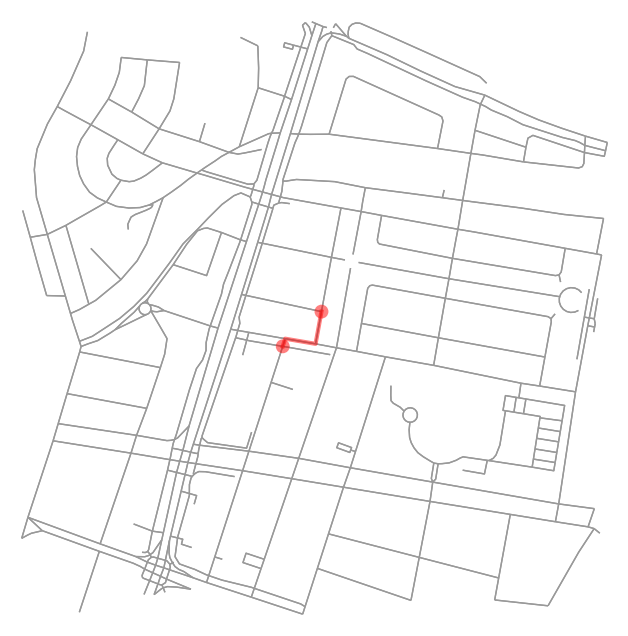

최단 경로 길이: 120.66m


In [12]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# 1. 지도 데이터 가져오기: 궁동 중심 좌표
center_point = (36.3575, 127.3445)  # 대전광역시 궁동 대략적인 중심 좌표
G = ox.graph_from_point(center_point, dist=500, network_type="walk")

# 2. 출발지와 도착지 설정
start_latlng = (36.3569, 127.3438)  # 은골어린이공원 대략적인 좌표
end_latlng = (36.3577, 127.3449)    # 궁동119안전센터 대략적인 좌표

# 3. 좌표를 기반으로 가장 가까운 노드 탐색
start_node = ox.distance.nearest_nodes(G, X=start_latlng[1], Y=start_latlng[0])
end_node = ox.distance.nearest_nodes(G, X=end_latlng[1], Y=end_latlng[0])

# 4. 최단 경로 탐색 (거리 기반)
shortest_path = nx.shortest_path(G, source=start_node, target=end_node, weight='length')

# 5. 최단 경로 시각화
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=3, node_size=0, bgcolor='white')

# 6. 최단 경로 거리 출력
shortest_path_length = nx.shortest_path_length(G, source=start_node, target=end_node, weight='length')
print(f"최단 경로 길이: {shortest_path_length:.2f}m")
